## Практическое задание №5 Оценка размытия систем с помощью функции передачи модуляции


**Цель**

Изучить метод оценки размытия деталей в оптических системах с
помощью функции передачи модуляции. Научиться сравнивать системы
регистрации изображений

In [5]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
import cv2


Исходные изображения

In [2]:
path_images_folder = r'E:\GitHub\Mag_2_semester\TechVision\PW_5\MTF'

In [6]:
path_images = [os.path.join(path_images_folder, path) for path in os.listdir(path_images_folder)]

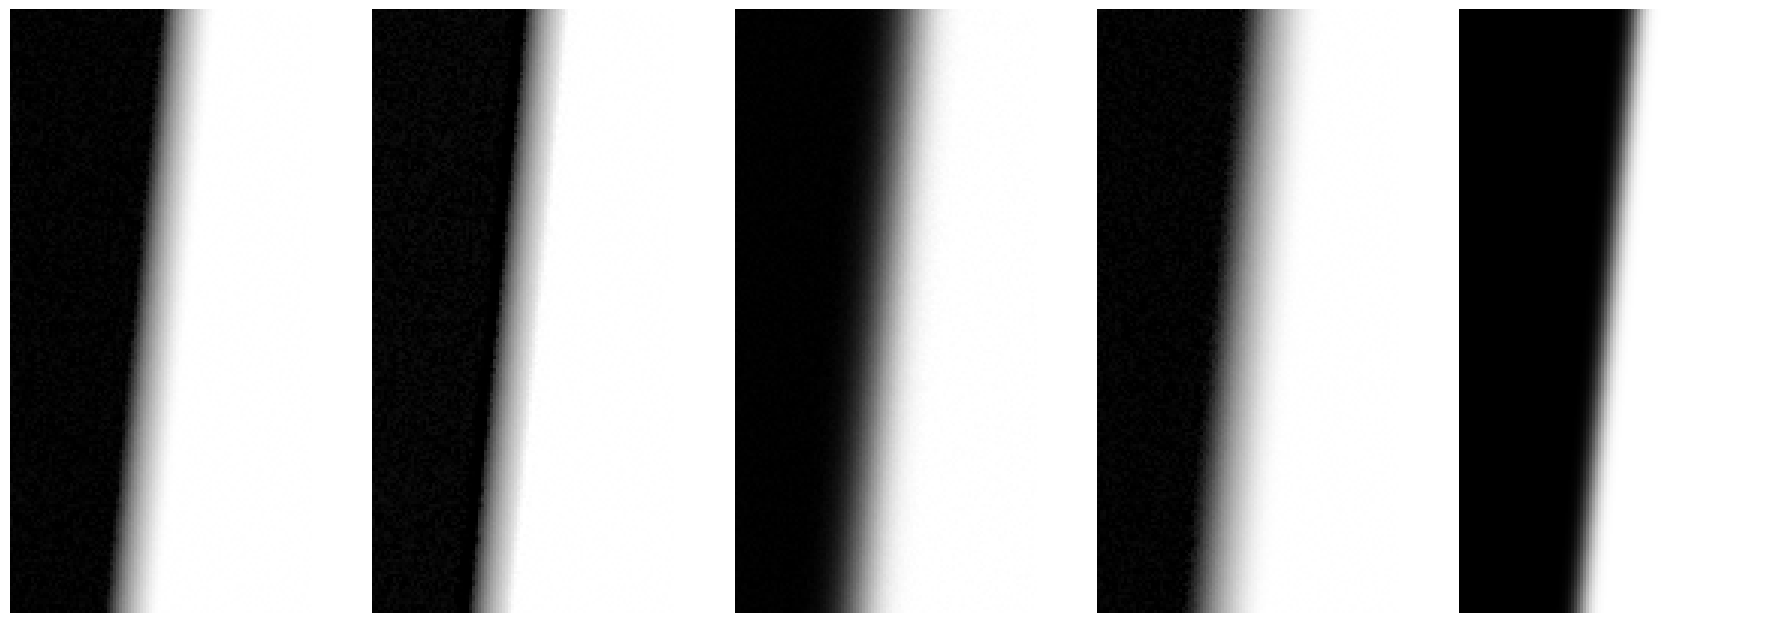

In [9]:
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in path_images]

f  = plt.figure(figsize=(60,60))
for i, img in enumerate(images):
    f.add_subplot(1,13, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis(False)

In [10]:
from skimage import  transform

In [16]:
def align(img):
    # выравнивание и заполнение пустот 
    img = transform.rotate(img, 5.3, preserve_range=True)
    row = img[len(img) // 2] / 255
    return np.full(img.shape, row)

Выровненные изображения 

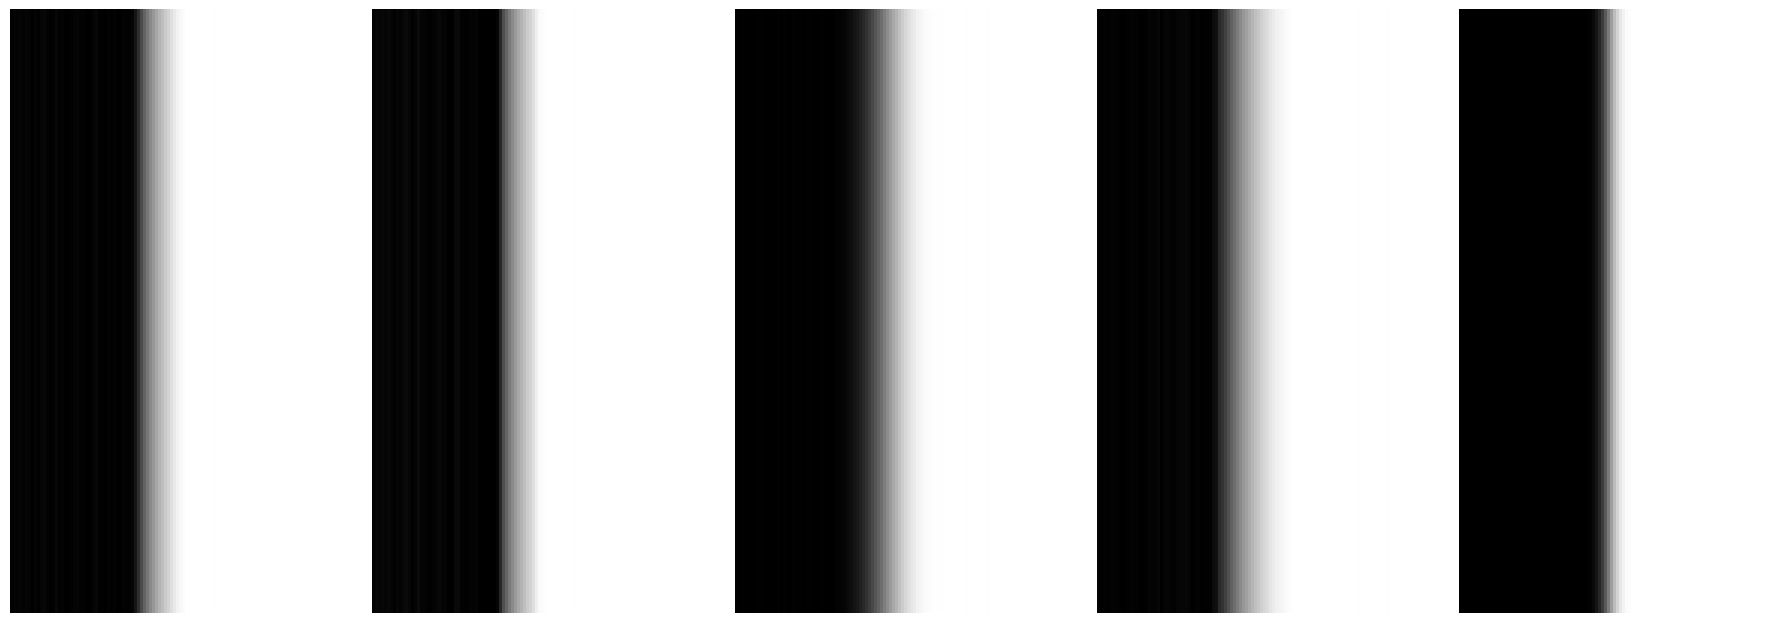

In [17]:
images_align = [align(img) for img in images]

f  = plt.figure(figsize=(60,60))
for i, img in enumerate(images_align):
    f.add_subplot(1,13, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis(False)

Краевая функция

In [20]:
def esf(image):
    return np.mean(image, axis=0) 

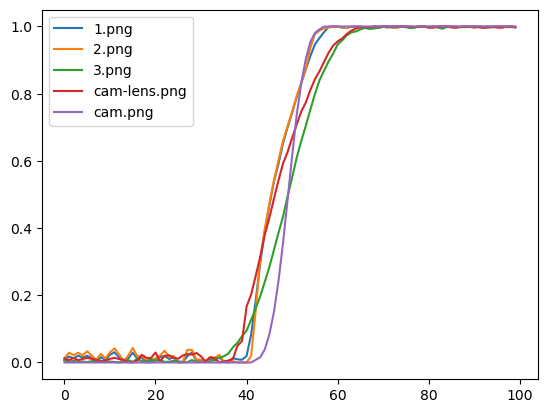

In [22]:
esf_images = [esf(image) for image in images_align]

for esf_image in esf_images:
    plt.plot( np.arange(len(esf_image)), esf_image)
plt.legend(os.listdir(path_images_folder))
plt.show()

Функция размытия линии

In [27]:
def lsf(esf_image):
    return np.gradient(esf_image)

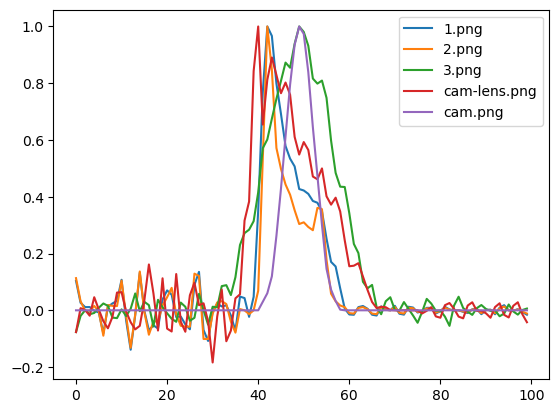

In [28]:
lsf_images = [lsf(esf_image) for esf_image in esf_images]

for lsf_image in lsf_images:
    plt.plot(np.arange(len(lsf_image)), lsf_image / max(lsf_image))
plt.legend(os.listdir(path_images_folder))
plt.show()

Функция передачи модуляции

In [29]:
def mtf(lsf_image):
    y = np.fft.fft(lsf_image)
    return np.abs(y/max(y))[:len(y)//10]

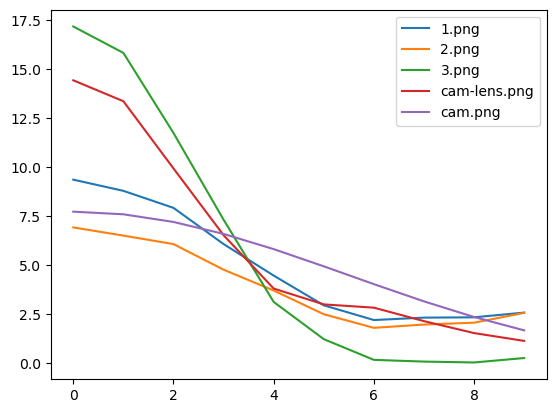

In [30]:
mtf_images = [mtf(lsf_image) for lsf_image in lsf_images]

for mtf_image, lsf_image in zip(mtf_images, lsf_images):
    plt.plot(np.arange(len(mtf_image)), mtf_image / max(lsf_image))
plt.legend(os.listdir(path_images_folder))
plt.show()

Функция передачи модуляции объектива

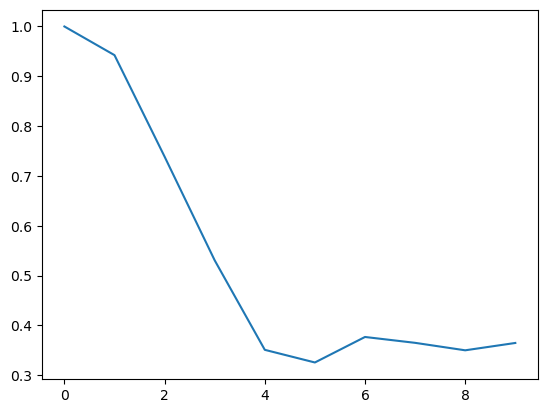

In [33]:
mtf_image_lens = mtf_images[3]
mtf_image_cam = mtf_images[4]
plt.plot(np.arange(len(mtf_image_lens)), np.divide(mtf_image_lens, mtf_image_cam))
plt.show()

## Вывод
Для краевой функции четкость границ изображения пропорционально искривлению верхунки графика
Для функции размытия линии четкость границ изображения пропорционально симметричности графика в центре
Для функции передачи модуляции контрастность изображения пропорционально изгибу графика 